,Station,Date & Time (Winter),Diffused radiation (W/m^2),Global radiation (W/m^2),Direct radiation (W/m^2),Relative humidity (%),Temperature (°C),Maximum temperature (°C),Minimum temperature (°C),Wind direction (°),Gust wind direction (°),Wind speed (m/s),Maximum 1 minute wind speed (m/s),Maximum 10 minutes wind speed (m/s),Time ending maximum 10 minutes wind speed (hhmm),Gust wind speed (m/s),Standard deviation wind direction (°),Rainfall (mm)
date,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,Jerusalem Givat Ram,01/01/2019 00:00,0.0,0.0,0.0,80.0,8.7,8.8,8.6,75.0,84.0,3.3,4.3,3.5,23:58,6.0,15.6,0.0
2019-01-01 00:10:00,Jerusalem Givat Ram,01/01/2019 00:10,0.0,0.0,0.0,79.0,8.7,8.8,8.7,74.0,82.0,3.3,4.1,3.3,00:01,4.9,14.3,0.0
2019-01-01 00:20:00,Jerusalem Givat Ram,01/01/2019 00:20,0.0,0.0,0.0,79.0,8.7,8.8,8.7,76.0,82.0,3.2,4.1,3.3,00:19,4.9,9.9,0.0
2019-01-01 00:30:00,Jerusalem Givat Ram,01/01/2019 00:30,0.0,0.0,0.0,79.0,8.7,8.7,8.6,78.0,73.0,3.6,4.2,3.6,00:30,5.2,11.7,0.0
2019-01-01 00:40:00,Jerusalem Givat Ram,01/01/2019 00:40,0.0,0.0,0.0,79.0,8.6,8.7,8.5,80.0,74.0,3.6,4.4,3.8,00:35,5.4,10.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:20:00,Jerusalem Givat Ram,31/12/2019 22:20,0.0,0.0,1.0,81.0,7.4,7.6,7.3,222.0,255.0,0.5,0.9,1.0,22:11,1.0,47.9,0.0
2019-12-31 22:30:00,Jerusalem Givat Ram,31/12/2019 22:30,0.0,0.0,1.0,83.0,7.3,7.4,7.3,266.0,259.0,0.6,0.8,0.6,22:28,1.1,22.8,0.0
2019-12-31 22:40:00,Jerusalem Givat Ram,31/12/2019 22:40,0.0,0.0,1.0,83.0,7.5,7.6,7.3,331.0,317.0,0.5,0.8,0.6,22:35,1.0,31.6,0.0


In [3]:
df.columns

Index(['Station', 'Date & Time (Winter)', 'Diffused radiation (W/m^2)',
       'Global radiation (W/m^2)', 'Direct radiation (W/m^2)',
       'Relative humidity (%)', 'Temperature (°C)', 'Maximum temperature (°C)',
       'Minimum temperature (°C)', 'Wind direction (°)',
       'Gust wind direction (°)', 'Wind speed (m/s)',
       'Maximum 1 minute wind speed (m/s)',
       'Maximum 10 minutes wind speed (m/s)',
       'Time ending maximum 10 minutes wind speed (hhmm)',
       'Gust wind speed (m/s)', 'Standard deviation wind direction (°)',
       'Rainfall (mm)'],
      dtype='object')

In [7]:
df_month = df[['Temperature (°C)',
               'Relative humidity (%)',]].resample('M').mean()
df_day = pd.DataFrame()
df_day['min temp'] = df['Temperature (°C)'].resample('D').min().to_frame()
df_day['max temp'] = df['Temperature (°C)'].resample('D').max().to_frame()

In [9]:
df_month['min temp'] = df_day['min temp'].resample('M').mean()
df_month['max temp'] = df_day['max temp'].resample('M').mean()

In [11]:
df_month['rain'] = df['Rainfall (mm)'].resample('M').sum()

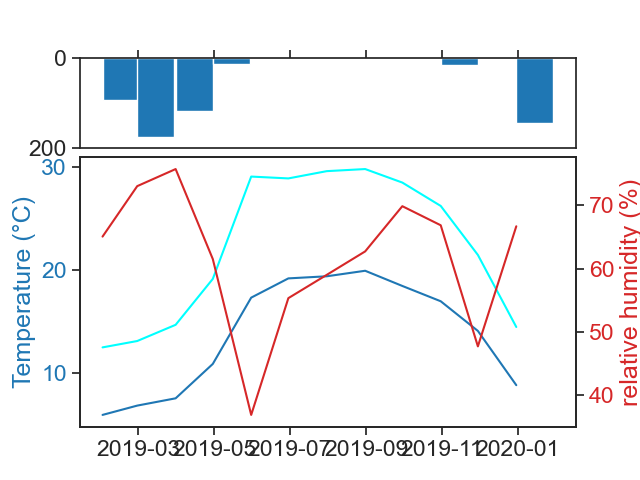

In [43]:
fig, ax = plt.subplots(2, 1,
                       sharex=True,
                       gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(#left=0.04, right=0.98, top=0.93, bottom=0.15,
                    hspace=0.05, wspace=0.02)
ax[0].bar(df_month.index, df_month['rain'],
          width=30, align='edge', color="tab:blue")
ax[0].set(ylim=[200, 0],
       #    xticklabels=[],
          )
ax[0].xaxis.tick_top()


ax[1].plot(df_month['min temp'], color='tab:blue')
ax[1].plot(df_month['max temp'], color="cyan")
ax[1].set_ylabel('Temperature (°C)', color='tab:blue')
ax[1].tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis
ax1b = ax[1].twinx()
ax1b.plot(df_month['Relative humidity (%)'], color='tab:red')
ax1b.set_ylabel('relative humidity (%)', color='tab:red')
ax1b.tick_params(axis='y', labelcolor='tab:red')

In [24]:
df_month.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [27]:
df_month.index.day.values

array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

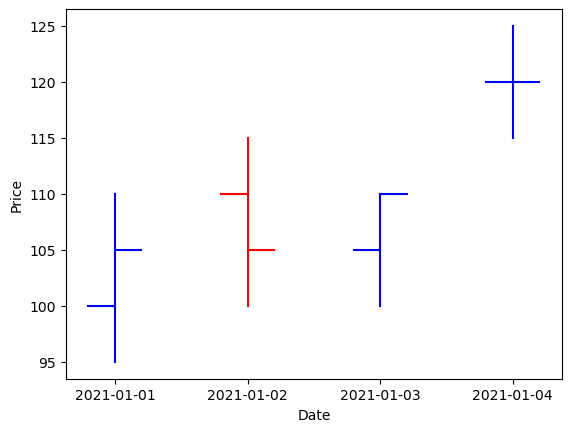

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Date, Open, High, Low, Close
data = {'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04'],
        'Open': [100, 110, 105, 120],
        'High': [110, 115, 110, 125],
        'Low': [95, 100, 100, 115],
        'Close': [105, 105, 110, 120]}

df = pd.DataFrame(data)

fig, ax = plt.subplots()

for i, (date, o, h, l, c) in enumerate(df.itertuples(index=False)):
    color = 'b' if c >= o else 'r'
    
    # Plot high-low bar
    ax.plot([i, i], [l, h], color=color)
    
    # Plot open tick
    ax.plot([i - 0.2, i], [o, o], color=color)
    
    # Plot close tick
    ax.plot([i, i + 0.2], [c, c], color=color)

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Date'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()
